<a href="https://colab.research.google.com/github/EMockevicius/deep-learning/blob/main/mnist_conv_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fine tuning MNIST model to increase its accuracy

# Defining custom models with multiple losses

Often it is needed to define a custom model with multiple losses. For example model performs regression task, predicting some function outcome based on an input value and together making classification of the same input value. Sometimes additional outputs are added to the model just for the training phase to "help" model train better and later removed.

TODO: Define model with two heads for MNIST task with additional head for `less than 5` and `odd`. Try training and see the result of classification `0-9` and then checking `< 5`, `odd` and fixing errors.

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # To run on CPU uncomment this
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import BatchNormalization

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"min = {np.min(x_train)}")
print(f"max = {np.max(x_train)}")
print(f"mean = {np.mean(x_train)}")
print(f"initial x_train.shape = {x_train.shape}")
print(f"initial y_train.shape = {y_train.shape}")

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

min = 0
max = 255
mean = 33.318421449829934
initial x_train.shape = (60000, 28, 28)
initial y_train.shape = (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train shape: (60000, 10)


In [ ]:
def get_model():
    inputs = keras.Input(shape=input_shape)

# pridedam BatchNormalization
    x = layers.BatchNormalization(momentum=0.8)(inputs)

    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)

# pridedam BatchNormalization
    x = layers.BatchNormalization(momentum=0.8)(x)

    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)

# pridedam BatchNormalization 
    x = layers.BatchNormalization(momentum=0.8)(x)

    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    
    return model

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                           

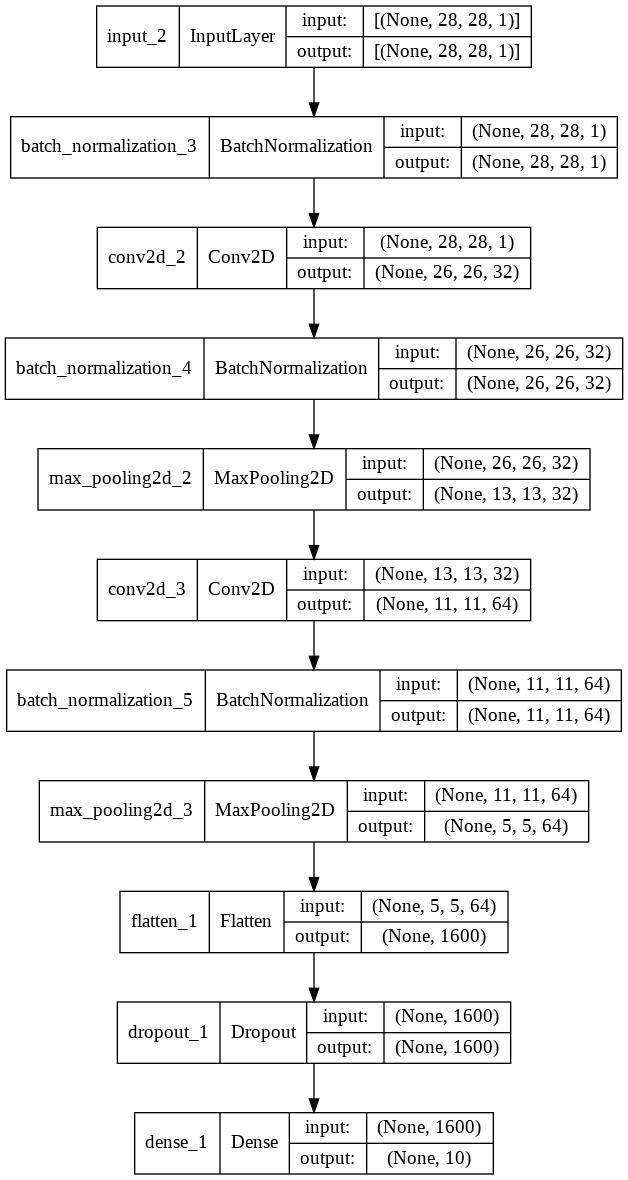

In [ ]:
model = get_model()
model.summary()
keras.utils.plot_model(model, to_file="single_head.jpg",
                       show_shapes=True,
                       show_layer_names=True,
                       rankdir="TB",
                       dpi=96)

In [ ]:
batch_size = 128
epochs = 50

optimizer = keras.optimizers.Adam(learning_rate=0.001,
#optimizer = keras.optimizers.Adamax(learning_rate=0.001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-07,
                                   amsgrad=False)

#model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

callbacks = [
    # We want to save model and weighs which got the lowest loss on validation set
    keras.callbacks.ModelCheckpoint("single_head_best_model.h5", monitor="val_loss", save_best_only=True),
    keras.callbacks.ModelCheckpoint("single_head_best_weights.h5", monitor="val_loss", save_weights_only=True, save_best_only=True),
    # If we get into problem (NaN in loss), we need to terminate training at once to stop wasting resources
    keras.callbacks.TerminateOnNaN(),
]

train_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=callbacks)

Epoch 1/50
422/422 [==============================] - 62s 145ms/step - loss: 0.0762 - accuracy: 0.8999 - val_loss: 0.0162 - val_accuracy: 0.9813
Epoch 2/50
422/422 [==============================] - 61s 144ms/step - loss: 0.0250 - accuracy: 0.9726 - val_loss: 0.0117 - val_accuracy: 0.9862
Epoch 3/50
422/422 [==============================] - 60s 142ms/step - loss: 0.0188 - accuracy: 0.9797 - val_loss: 0.0097 - val_accuracy: 0.9903
Epoch 4/50
422/422 [==============================] - 60s 141ms/step - loss: 0.0156 - accuracy: 0.9837 - val_loss: 0.0088 - val_accuracy: 0.9907
Epoch 5/50
422/422 [==============================] - 59s 141ms/step - loss: 0.0139 - accuracy: 0.9856 - val_loss: 0.0088 - val_accuracy: 0.9895
Epoch 6/50
422/422 [==============================] - 60s 142ms/step - loss: 0.0125 - accuracy: 0.9870 - val_loss: 0.0080 - val_accuracy: 0.9920
Epoch 7/50
422/422 [==============================] - 60s 141ms/step - loss: 0.0120 - accuracy: 0.9879 - val_loss: 0.0078 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.005715417675673962
Test accuracy: 0.9929999709129333


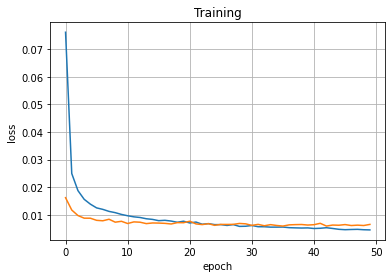

In [ ]:
epochs = list(range(len(train_history.history['loss'])))

plt.figure()
plt.grid()
plt.title("Training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epochs, train_history.history['loss'], epochs, train_history.history['val_loss']);

In [ ]:
model.save("single_head_model.h5")
model.save_weights("single_head_weights.h5")

In [ ]:
# Clean old model and load one with the lowest validation loss
del model
keras.backend.clear_session()
model = keras.models.load_model("single_head_best_model.h5")

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.006396211683750153
Test accuracy: 0.9934999942779541
